- **Nama : Reza Liswara**
- **NIM : 11160940000033**

# Import Package

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True)
import cufflinks as cf
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)
from sklearn.base import TransformerMixin
import squarify

%matplotlib inline

# Input Data Yang Akan Di Olah

Data yang diambil adalah Tv Show dan Movies yang tersedia di Netflix dari tahun 2008 sampai 2019 kemarin. Data di bawah ini didapat dari website Kaggle.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

Column:

- country : Country of the show/movie
- date_added : Date it was added on Netflix
- release_year : Original release year of the movie
- rating : The TV Rating
- duration : Total Duration of the show/movie
- listed_in : categories / generes
- description : textual short description of the show/movie
- typeis : it a tv show or movie

In [58]:
df_asli = pd.read_csv('netflix.csv')
df = df_asli.copy()
df

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie
8,70205672,La Reina del Sur,NaN,"Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico",NaN,2019,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...",This compelling show tells the story of the le...,TV Show
9,81172841,Lagos Real Fake Life,Mike Ezuruonye,"Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex ...",NaN,"November 29, 2019",2018,TV-14,118 min,"Comedies, International Movies",Two mooching friends vie for the attention of ...,Movie


# Hipotesis
Adapun beberapa hipotesis berdasarkan data di atas, yaitu:

- Konten yang tersedia di Netflix sebagian besar adalah TV Show.
- Drama menjadi genre terpopuler di Netflix.
- Konten yang tersedia paling banyak berasal dari Amerika Serikat.
- Target pasar Netflix adalah masyarakat dengan umur 17 tahun ke atas.

# Cek Info Data

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
show_id         5837 non-null int64
title           5837 non-null object
director        3936 non-null object
cast            5281 non-null object
country         5410 non-null object
date_added      5195 non-null object
release_year    5837 non-null int64
rating          5827 non-null object
duration        5837 non-null object
listed_in       5837 non-null object
description     5837 non-null object
type            5837 non-null object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


# Preprocessing

## Melihat dan Mengatasi _Missing Value_

In [60]:
print(df.isnull().sum())

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64


In [61]:
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
df2 = DataFrameImputer().fit_transform(df)
df2.isnull().sum()

show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64

In [62]:
df2

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,"Raúl Campos, Jan Suter","Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,United States,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,"Raúl Campos, Jan Suter","Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom","November 1, 2019",2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,"November 29, 2019",2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,"November 29, 2019",2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie
7,81227195,Kalushi: The Story of Solomon Mahlangu,Mandla Dube,"Thabo Rametsi, Thabo Malema, Welile Nzuza, Jaf...",South Africa,"November 29, 2019",2016,TV-MA,107 min,"Dramas, International Movies",The life and times of iconic South African lib...,Movie
8,70205672,La Reina del Sur,"Raúl Campos, Jan Suter","Kate del Castillo, Cristina Urgel, Alberto Jim...","United States, Spain, Colombia, Mexico","November 1, 2019",2019,TV-14,2 Seasons,"Crime TV Shows, International TV Shows, Spanis...",This compelling show tells the story of the le...,TV Show
9,81172841,Lagos Real Fake Life,Mike Ezuruonye,"Nonso Diobi, Mike Ezuruonye, Mercy Aigbe, Rex ...",United States,"November 29, 2019",2018,TV-14,118 min,"Comedies, International Movies",Two mooching friends vie for the attention of ...,Movie


## Melihat dan Mengatasi Outlier

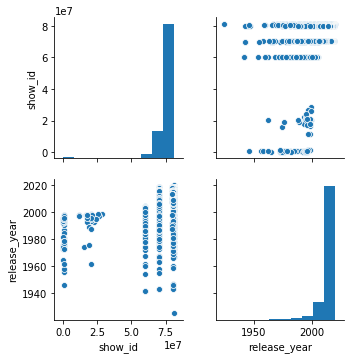

In [63]:
sns.pairplot(df2)

In [64]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

show_id         196673.0
release_year         5.0
dtype: float64


In [65]:
df_clean = df2[~((df2<(Q1-1.5*IQR))|(df2<(Q3+1.5*IQR))).any(axis = 1)]
df_clean.shape

(0, 12)

In [66]:
df_clean

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type


In [67]:
df2.shape

(5837, 12)

Proses mengatasi outlier tidak mungkin dilakukan, karena akan menghapus semua data di dalam tabel tersebut. Sehingga belum menemukan cara yang tepat untuk mengatasi outlier.

## Mengubah tipe data

In [68]:
#Membuat fitur baru sekaligus mengganti tipe data
df2["date_added"] = pd.to_datetime(df2['date_added'])
df2['year_added'] = df2['date_added'].dt.year
df2['month_added'] = df2['date_added'].dt.month

df2['season_count'] = df2.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df2['duration'] = df2.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
df2.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added,month_added,season_count
0,81193313,Chocolate,"Raúl Campos, Jan Suter","Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019,11,1
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,United States,2019-11-30,2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019,11,
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019,11,
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019,11,
4,80213643,Chip and Potato,"Raúl Campos, Jan Suter","Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",2019-11-01,2019,TV-Y,,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,2019,11,2


## Info data setelah dilakukan perubahan tipe data

In [69]:
df2.describe()

,show_id,release_year,year_added,month_added
count,5.837000e+03,5837.000000,5837.000000,5837.000000
mean,7.730079e+07,2013.688539,2017.992291,7.260579
std,9.479777e+06,8.419088,1.158058,3.528613
min,2.698800e+05,1925.000000,2008.000000,1.000000
25%,8.004520e+07,2013.000000,2017.000000,4.000000
50%,8.016353e+07,2016.000000,2018.000000,8.000000
75%,8.024188e+07,2018.000000,2019.000000,11.000000
max,8.122720e+07,2020.000000,2019.000000,12.000000


In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 15 columns):
show_id         5837 non-null int64
title           5837 non-null object
director        5837 non-null object
cast            5837 non-null object
country         5837 non-null object
date_added      5837 non-null datetime64[ns]
release_year    5837 non-null int64
rating          5837 non-null object
duration        5837 non-null object
listed_in       5837 non-null object
description     5837 non-null object
type            5837 non-null object
year_added      5837 non-null int64
month_added     5837 non-null int64
season_count    5837 non-null object
dtypes: datetime64[ns](1), int64(4), object(10)
memory usage: 684.1+ KB


# Analisa EDA

## Melihat persentase jumlah TV show dan movies

In [71]:
def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace


py.iplot([pie_plot(df2['type'].value_counts(), ['red', 'blue'], 'Konten yang tersedia')])

Ternyata pada platform Netflix sebagian besar kontennya berisi Movie dengan persentase 67.5% sebanyak 3939 buah. Hal ini menandakan banyak film yang sudah pernah tayang hadir kembali di Netflix.

## Bagaimana durasi dari setiap konten di Netflix?

In [75]:
trace = go.Histogram(
                     x = df2['duration'],
                     xbins=dict(size=0.5),
                     marker = dict(color = 'rgb(26, 118, 255)'))
layout = go.Layout(template= "plotly_dark", title = 'Distribusi Durasi', xaxis = dict(title = 'Menit'))
fig = go.Figure(data = [trace], layout = layout)
fig.show()

Terlihat rata-rata konten di Netflix berdurasi 100 menit untuk satu film. Untuk acara yang berdurasi minimal 1 season tidak ada keterangan berapa durasi untuk setiap episode, sehingga grafik di atas hanya untuk konten dengan type 'Movie".

## Genre yang paling banyak pada Netflix

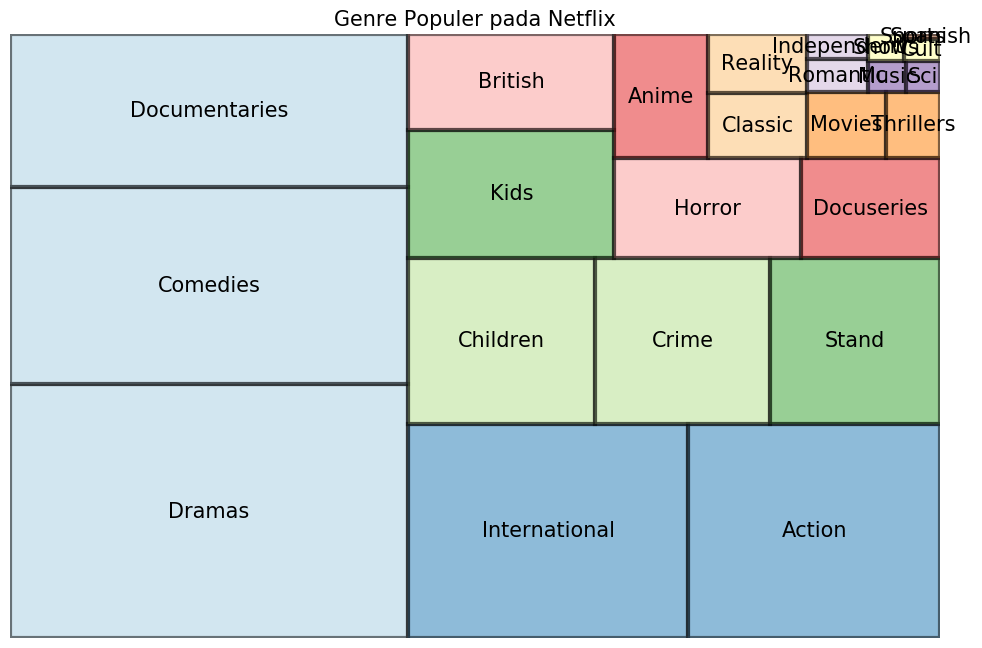

In [50]:
df['Genres'] = df['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)
temp_df = df['Genres'].value_counts().reset_index()

sizes=np.array(temp_df['Genres'])
labels=temp_df['index']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':15})
plt.title('Genre Populer pada Netflix', fontsize = 15)
plt.axis('off')
plt.show()

Netflik memberikan konten tv show dan movie yang berfokus pada genre drama, komedi, dokumenter, aksi dan internasional. Bisa disimpulkan bahwa target utama konsumen dari Netflix itu adalah remaja dan orang dewasa bukan untuk anak-anak karena konten dengan genre children maupun kids tidak masuk 5 teratas di Netflix.

## Rating berdasarkan konten

In [53]:
temp_df = df2['rating'].value_counts().reset_index()

def pie_plot(cnt_srs, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

py.iplot([pie_plot(df2['rating'].value_counts(), 'Content Type')])

Rating tertinggi pada Netflix adalah TV-MA sebanyak 1947 atau sebesar 33.4%, lalu disusul dengan rating TV-PG sebanyak 1593 atau 27.3%. Hal ini bisa terjadi karena pada analisa sebelumnya didapatkan bahwa Netflix menargetkan remaja dan orang dewasa menjadi konsumen utama karena genre yang mereka tawarkan kebanyakan adalah drama, komedi, dokumenter, aksi dan internasional. 5 genre tersebut memang menjadi favorit di kalangan remaja maupun orang dewasa.

### TV-MA
Maksud dari rating ini adalah acara atau film yang ditampilkan dikhususkan untuk umur 17 tahun ke atas. Karena banyak mengandung kekerasan (_violence_), hal berbau seks, dan bahasa yang kasar atau tidak layak untuk didengarkan.

### TV-PG
Rating ini menjelaskan bahwa anak-anak dibawah umur harus dibawah arahan dan pengawasan orang tua. Konten dengan rating ini mengandung sedikit kekerasan, bahasa kasar, dan konten seksual.

## Negara yang paling banyak menyumbang konten di Netflix

In [76]:
temp_df = df2['country'].value_counts().reset_index()[:20]


trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['country'],
                marker = dict(color = 'rgb(153,255,153)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'TOP 20 NEGARA DENGAN KONTEN TERBANYAK' , xaxis = dict(title = 'Negara'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

Sudah jelas bahwa Amerika Serikat paling banyak menyumpan konten di Netflix, karena Netflix sendiri berasal dan berpusat di Los Gatos, California, Amerika Serikat. Sehingga tidak heran Amerika Serikat mendudukin peringkat pertama. 